# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hadeel Yasser

ID: 49-8371

Tutorial: 6

---

Name: Hania Elkhayat

ID: 49-1150

Tutorial: 6

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
#to view the last 10 tuples
df.tail(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
46568,2006,Chevrolet,Impala,LT,Sedan,automatic,2g1wc581x69362856,ca,2.0,152410.0mi,blue,gray,veros credit,$2825,$2150,Thu Jan 15 2015 04:00:00 GMT-0800 (PST)
46569,2005,Cadillac,Escalade,Base,SUV,automatic,1gyek63nx5r135901,va,3.8,127574.0mi,off-white,tan,shirlie slack mitsubishi,$8550,$12800,Thu Feb 12 2015 01:35:00 GMT-0800 (PST)
46570,2014,Audi,A5,2.0T Premium Plus quattro,Coupe,automatic,waulfafr9ea023041,ca,3.7,13107.0mi,black,brown,century dealer services corp,$34900,$35000,Wed Feb 25 2015 04:00:00 GMT-0800 (PST)
46571,2008,Saturn,Aura,XE,Sedan,automatic,1g8zs57b48f278750,fl,4.1,75624.0mi,silver,gray,santander consumer,$5975,$7300,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)
46572,2006,Volvo,S40,2.4i,Sedan,automatic,yv1ms390462186357,ca,3.8,56993.0mi,gray,gray,prestige auto wholesale inc,$6350,$7000,Tue May 26 2015 05:30:00 GMT-0700 (PDT)
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0mi,silver,black,kia motors finance,$9700,$9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


In [ ]:
#checking if there are any null values
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [ ]:
# data type of each variable/dimension
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


In [ ]:
# statistical information about the dataset
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
# to know the number of unique values in each column, the most common value and its frequency
# most common is the top value
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578,46578,46578,46578,46578,46578,46578
unique,NaN,48,648,1097,71,2,46578,34,NaN,39460,20,17,4686,1021,953,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,fl,NaN,1.0mi,black,black,"ford motor credit company,llc",$11300,$12000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,7871,1610,4851,17171,44928,1,7451,NaN,86,9156,20734,1733,168,397,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can conclude that the most popular car brand is ***Ford***\
Even though *Ford* had the highest sale, the most sold car model was *Nissan Altima*\
The most popular body type is sedan

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
# convert necessary columns into the correct datatype 
#Eliminating text characters to convert odometer --> float 
df['odometer'] = df['odometer'].str.extract('([1.0-9.9]+)', expand=False).str.strip()

df['odometer']=df['odometer'].astype(float)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 5.7+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
# saledate -->datetime
df['saledate']=pd.to_datetime(df['saledate'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 5.7+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,$11000,$10900,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,$28700,$29900,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,$22200,$24200,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,$3675,$3200,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,$22500,$22100,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,—,gray,wheels exchange llc,$15650,$17000,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,$19350,$21500,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,$22200,$22000,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,$13400,$13800,2015-01-14 04:30:00+08:00


In [ ]:
#Upper case for all 'state' attribute
df['state'] = df['state'].str.upper()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,the hertz corporation,$11000,$10900,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0,gray,—,award auto sales and leasing inc,$28700,$29900,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,lexus financial services,$22200,$24200,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0,black,black,peddle llc,$3675,$3200,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,u-haul,$22500,$22100,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844.0,—,gray,wheels exchange llc,$15650,$17000,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185.0,black,black,nissan infiniti lt,$19350,$21500,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357.0,white,beige,motorcars of south texas,$22200,$22000,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376.0,black,beige,avis rac/san leandro,$13400,$13800,2015-01-14 04:30:00+08:00


In [ ]:
#Capitalizing first letter in the text value
df['seller'] = df['seller'].str.capitalize()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,The hertz corporation,$11000,$10900,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0,gray,—,Award auto sales and leasing inc,$28700,$29900,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,Lexus financial services,$22200,$24200,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0,black,black,Peddle llc,$3675,$3200,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,U-haul,$22500,$22100,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844.0,—,gray,Wheels exchange llc,$15650,$17000,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185.0,black,black,Nissan infiniti lt,$19350,$21500,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357.0,white,beige,Motorcars of south texas,$22200,$22000,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376.0,black,beige,Avis rac/san leandro,$13400,$13800,2015-01-14 04:30:00+08:00


In [ ]:
#Removing dollar sign and converting to float
df['mmr'] = df['mmr'].str.replace('$', '')
df['mmr']=df['mmr'].astype(float)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  float64
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(3), int64(1), object(12)
memory usage: 5.7+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,The hertz corporation,11000.0,$10900,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0,gray,—,Award auto sales and leasing inc,28700.0,$29900,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,Lexus financial services,22200.0,$24200,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0,black,black,Peddle llc,3675.0,$3200,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,U-haul,22500.0,$22100,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844.0,—,gray,Wheels exchange llc,15650.0,$17000,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185.0,black,black,Nissan infiniti lt,19350.0,$21500,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357.0,white,beige,Motorcars of south texas,22200.0,$22000,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376.0,black,beige,Avis rac/san leandro,13400.0,$13800,2015-01-14 04:30:00+08:00


In [ ]:
#Renaming the columns 
df.columns = df.columns.str.replace('mmr', 'mmr in dollars')
df.columns = df.columns.str.replace('sellingprice', 'sellingprice in dollars')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     46578 non-null  int64  
 1   make                     46578 non-null  object 
 2   model                    46578 non-null  object 
 3   trim                     46578 non-null  object 
 4   body                     46578 non-null  object 
 5   transmission             46578 non-null  object 
 6   vin                      46578 non-null  object 
 7   state                    46578 non-null  object 
 8   condition                46578 non-null  float64
 9   odometer                 46578 non-null  float64
 10  color                    46578 non-null  object 
 11  interior                 46578 non-null  object 
 12  seller                   46578 non-null  object 
 13  mmr in dollars           46578 non-null  float64
 14  sellingprice in dollar

In [ ]:
#Removing dollar sign and convering to float
df['sellingprice in dollars'] = df['sellingprice in dollars'].str.replace('$', '')
df['sellingprice in dollars']=df['sellingprice in dollars'].astype(float)
df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     46578 non-null  int64  
 1   make                     46578 non-null  object 
 2   model                    46578 non-null  object 
 3   trim                     46578 non-null  object 
 4   body                     46578 non-null  object 
 5   transmission             46578 non-null  object 
 6   vin                      46578 non-null  object 
 7   state                    46578 non-null  object 
 8   condition                46578 non-null  float64
 9   odometer                 46578 non-null  float64
 10  color                    46578 non-null  object 
 11  interior                 46578 non-null  object 
 12  seller                   46578 non-null  object 
 13  mmr in dollars           46578 non-null  float64
 14  sellingprice in dollar

In [ ]:
#Renaming make and color columns
df.columns = df.columns.str.replace('make', 'car brands')
df.columns = df.columns.str.replace('color', 'exterior color')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     46578 non-null  int64  
 1   car brands               46578 non-null  object 
 2   model                    46578 non-null  object 
 3   trim                     46578 non-null  object 
 4   body                     46578 non-null  object 
 5   transmission             46578 non-null  object 
 6   vin                      46578 non-null  object 
 7   state                    46578 non-null  object 
 8   condition                46578 non-null  float64
 9   odometer                 46578 non-null  float64
 10  exterior color           46578 non-null  object 
 11  interior                 46578 non-null  object 
 12  seller                   46578 non-null  object 
 13  mmr in dollars           46578 non-null  float64
 14  sellingprice in dollar

In [ ]:
# black was deduced from the describe function that showed that black was the most frequent color (top)

df['exterior color'] = df['exterior color'].str.replace('—', 'black')
df


,year,car brands,model,trim,body,transmission,vin,state,condition,odometer,exterior color,interior,seller,mmr in dollars,sellingprice in dollars,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,The hertz corporation,11000.0,10900.0,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0,gray,—,Award auto sales and leasing inc,28700.0,29900.0,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,Lexus financial services,22200.0,24200.0,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0,black,black,Peddle llc,3675.0,3200.0,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,U-haul,22500.0,22100.0,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844.0,black,gray,Wheels exchange llc,15650.0,17000.0,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185.0,black,black,Nissan infiniti lt,19350.0,21500.0,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357.0,white,beige,Motorcars of south texas,22200.0,22000.0,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376.0,black,beige,Avis rac/san leandro,13400.0,13800.0,2015-01-14 04:30:00+08:00


In [ ]:
#Filling the missing values with the mode color
df['interior'] = df['interior'].str.replace('—', 'black')
df

,year,car brands,model,trim,body,transmission,vin,state,condition,odometer,exterior color,interior,seller,mmr in dollars,sellingprice in dollars,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,The hertz corporation,11000.0,10900.0,2015-06-02 02:30:00+07:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,FL,4.9,17846.0,gray,black,Award auto sales and leasing inc,28700.0,29900.0,2015-02-18 07:15:00+08:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,Lexus financial services,22200.0,24200.0,2015-01-20 01:30:00+08:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,FL,1.9,145303.0,black,black,Peddle llc,3675.0,3200.0,2015-03-04 07:10:00+08:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,U-haul,22500.0,22100.0,2015-02-18 06:45:00+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,VA,3.5,52844.0,black,gray,Wheels exchange llc,15650.0,17000.0,2015-01-07 09:30:00+08:00
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,CA,4.5,23185.0,black,black,Nissan infiniti lt,19350.0,21500.0,2015-06-18 05:30:00+07:00
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,TX,4.2,45357.0,white,beige,Motorcars of south texas,22200.0,22000.0,2015-02-18 02:00:00+08:00
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,CA,3.5,43376.0,black,beige,Avis rac/san leandro,13400.0,13800.0,2015-01-14 04:30:00+08:00


In [ ]:
#Capitlizing first letter in each word
df['body'] = df['body'].str.title()
df['body'].unique()

array(['Sedan', 'Suv', 'E-Series Van', 'Crew Cab', 'G Sedan', 'Wagon',
       'Regular Cab', 'Double Cab', 'Coupe', 'Minivan', 'Supercrew',
       'Convertible', 'Extended Cab', 'Hatchback', 'Van', 'Supercab',
       'King Cab', 'G Convertible', 'Quad Cab', 'Beetle Convertible',
       'G Coupe', 'Crewmax Cab', 'Club Cab', 'Access Cab',
       'Genesis Coupe', 'G37 Convertible', 'Cab Plus 4',
       'Promaster Cargo Van', 'Mega Cab', 'Koup', 'Elantra Coupe',
       'Q60 Convertible', 'Regular-Cab', 'Xtracab', 'Cts Coupe',
       'Cts Wagon', 'Granturismo Convertible', 'Tsx Sport Wagon',
       'Cts-V Coupe', 'Q60 Coupe', 'Transit Van'], dtype=object)

In [ ]:
               
#Saving the needed categories in a list to remove any other noise in the 'body'
types = ["Cab","Sedan","Convertible", "Coupe", "Hatchback","Suv","Minivan", "Wagon","Supercab","Koup","Xtracab","Van","Supercrew"]
keyword= '|'.join(r"{}".format(x) for x in types)
df['body'] = df['body'].str.extract('('+ keyword +')',expand=False)

print(keyword)

Cab|Sedan|Convertible|Coupe|Hatchback|Suv|Minivan|Wagon|Supercab|Koup|Xtracab|Van|Supercrew


In [ ]:
#Replacing the body data with correct values
df['body'] = df['body'].str.replace('Cab', 'Pickup Truck')
df['body'] = df['body'].str.replace('Supercab', 'Pickup Truck')
df['body'] = df['body'].str.replace('Xtracab', 'Pickup Truck')
df['body'] = df['body'].str.replace('Supercrew', 'Pickup Truck')
df['body'] = df['body'].str.replace('Koup', 'Coupe')
df['body'] = df['body'].str.replace('Suv', 'SUV')
df['body'] = df['body'].str.replace('Van', 'Minivan')

df['body'].unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [ ]:
df['body'].unique()
df.describe(include='all')


,year,car brands,model,trim,body,transmission,vin,state,condition,odometer,exterior color,interior,seller,mmr in dollars,sellingprice in dollars,saledate
count,46578.000000,46578,46578,46578,46578,46578,46578,46578,46578.000000,46578.000000,46578,46578,46578,46578.000000,46578.000000,46578
unique,NaN,48,648,1097,8,2,46578,34,NaN,NaN,19,16,4686,NaN,NaN,2286
top,NaN,Ford,Altima,Base,Sedan,automatic,5npeb4acxdh702805,FL,NaN,NaN,black,black,"Ford motor credit company,llc",NaN,NaN,2015-02-10 01:30:00+08:00
freq,NaN,7871,1610,4851,21574,44928,1,7451,NaN,NaN,11402,21722,1733,NaN,NaN,490
mean,2010.203401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.424265,66850.642621,NaN,NaN,NaN,13810.580102,13669.705204,NaN
std,3.831316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944009,51868.395670,NaN,NaN,NaN,9510.332473,9632.257208,NaN
min,1990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,150.000000,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,28185.000000,NaN,NaN,NaN,7400.000000,7100.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,51193.000000,NaN,NaN,NaN,12300.000000,12200.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.200000,97146.500000,NaN,NaN,NaN,18250.000000,18200.000000,NaN


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

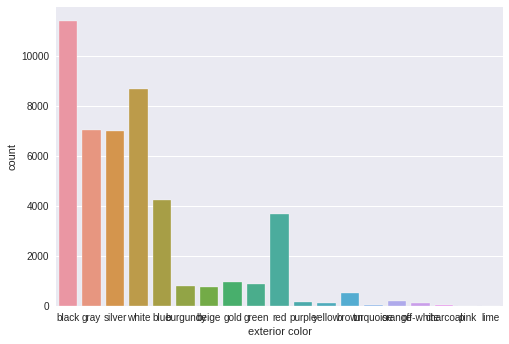

In [ ]:
# Basic, minimal plot example
sns.countplot(x='exterior color', data=df)

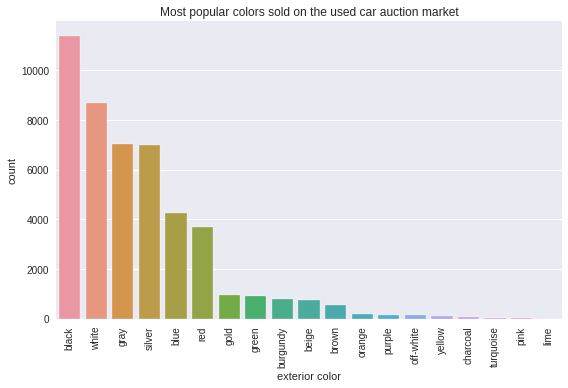

In [ ]:
#to get the most purchased car color in an enhanced version
large_to_small = df.groupby('exterior color').size().sort_values(ascending=False)
sns.countplot(x='exterior color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

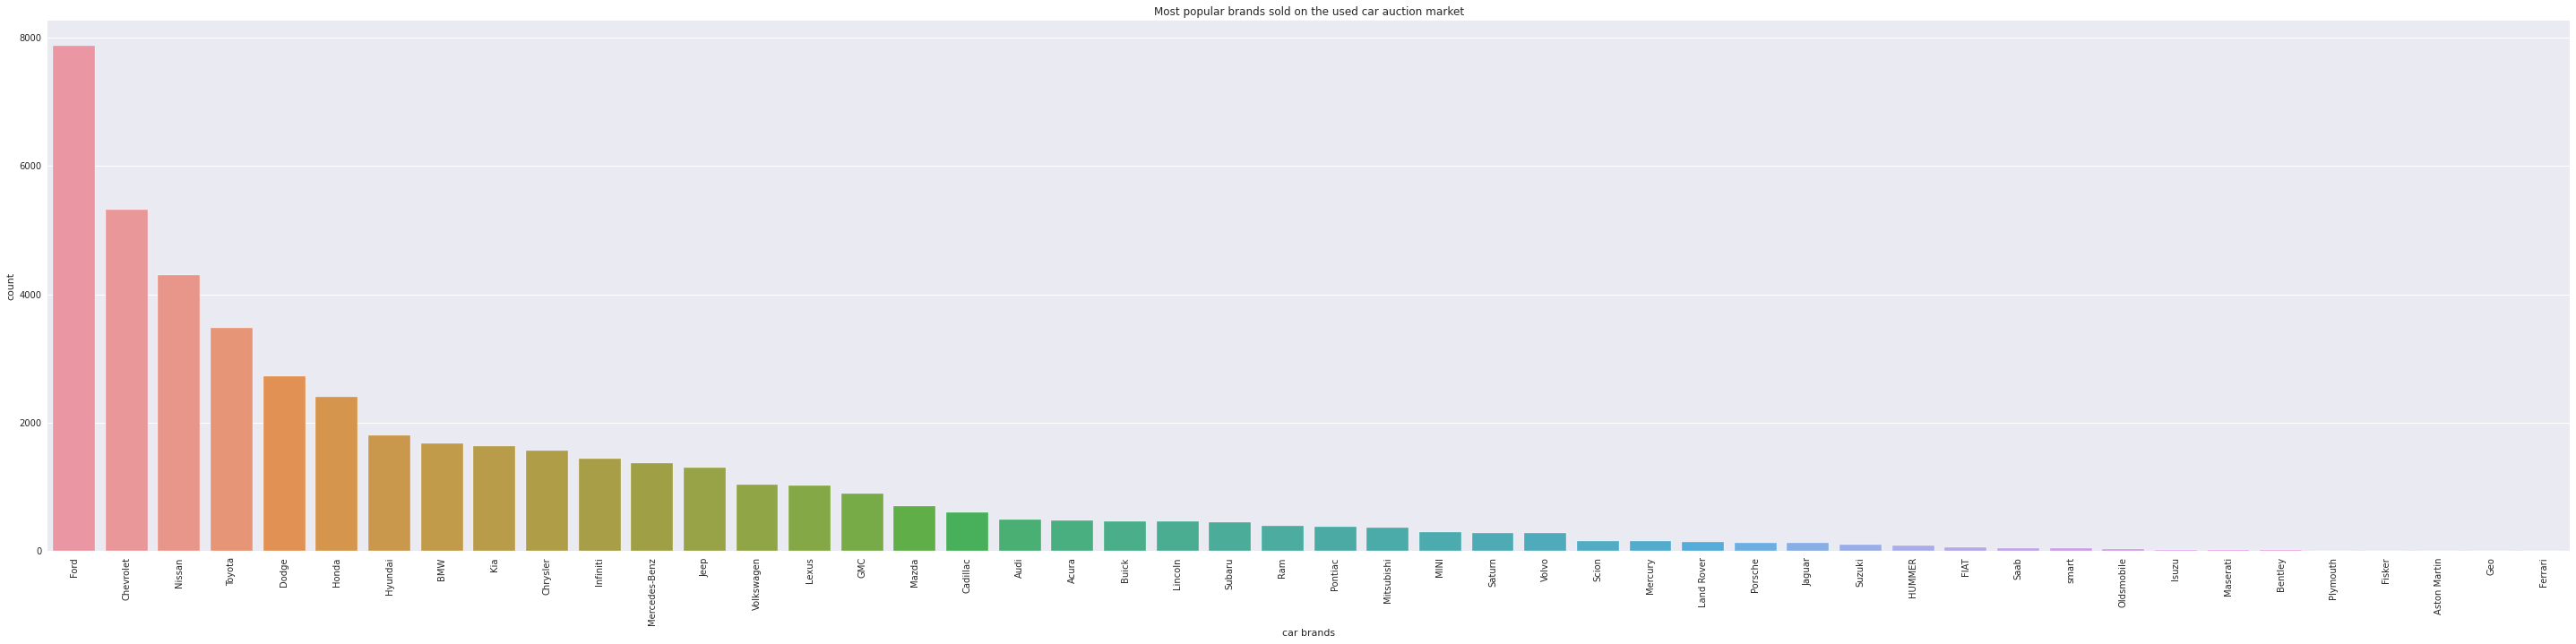

In [ ]:
# to get the most popular car brands

plt.figure(figsize = (40,10))
large_to_small = df.groupby('car brands').size().sort_values(ascending=False)
sns.countplot(x='car brands', data=df, order=large_to_small.index).set(title='Most popular brands sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()
sns.set(font_scale=5)



**Answer for Q1**: The most popular car brands based on the number of occurrences in the dataset are Ford, Chevrolet and Nissan
   

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

In [ ]:
# calculating the average selling price for automatic and manual cars
df.groupby('transmission')['sellingprice in dollars'].mean()

#df['transmission'].value_counts()

transmission
automatic    13761.075476
manual       11181.775758
Name: sellingprice in dollars, dtype: float64

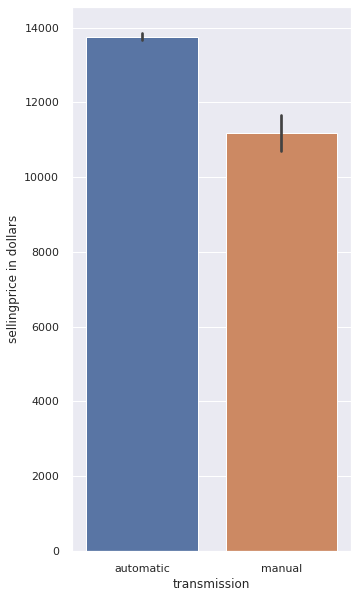

In [ ]:
#plotting the average selling price
plt.figure(figsize = (5,10))
sns.set(font_scale=1)
sns.barplot(data=df, x="transmission", y="sellingprice in dollars")

**Answer for Q2**: Yes, Automatic's average selling price is 13761.0 dollars and for the manual, 11181.8 dollars

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

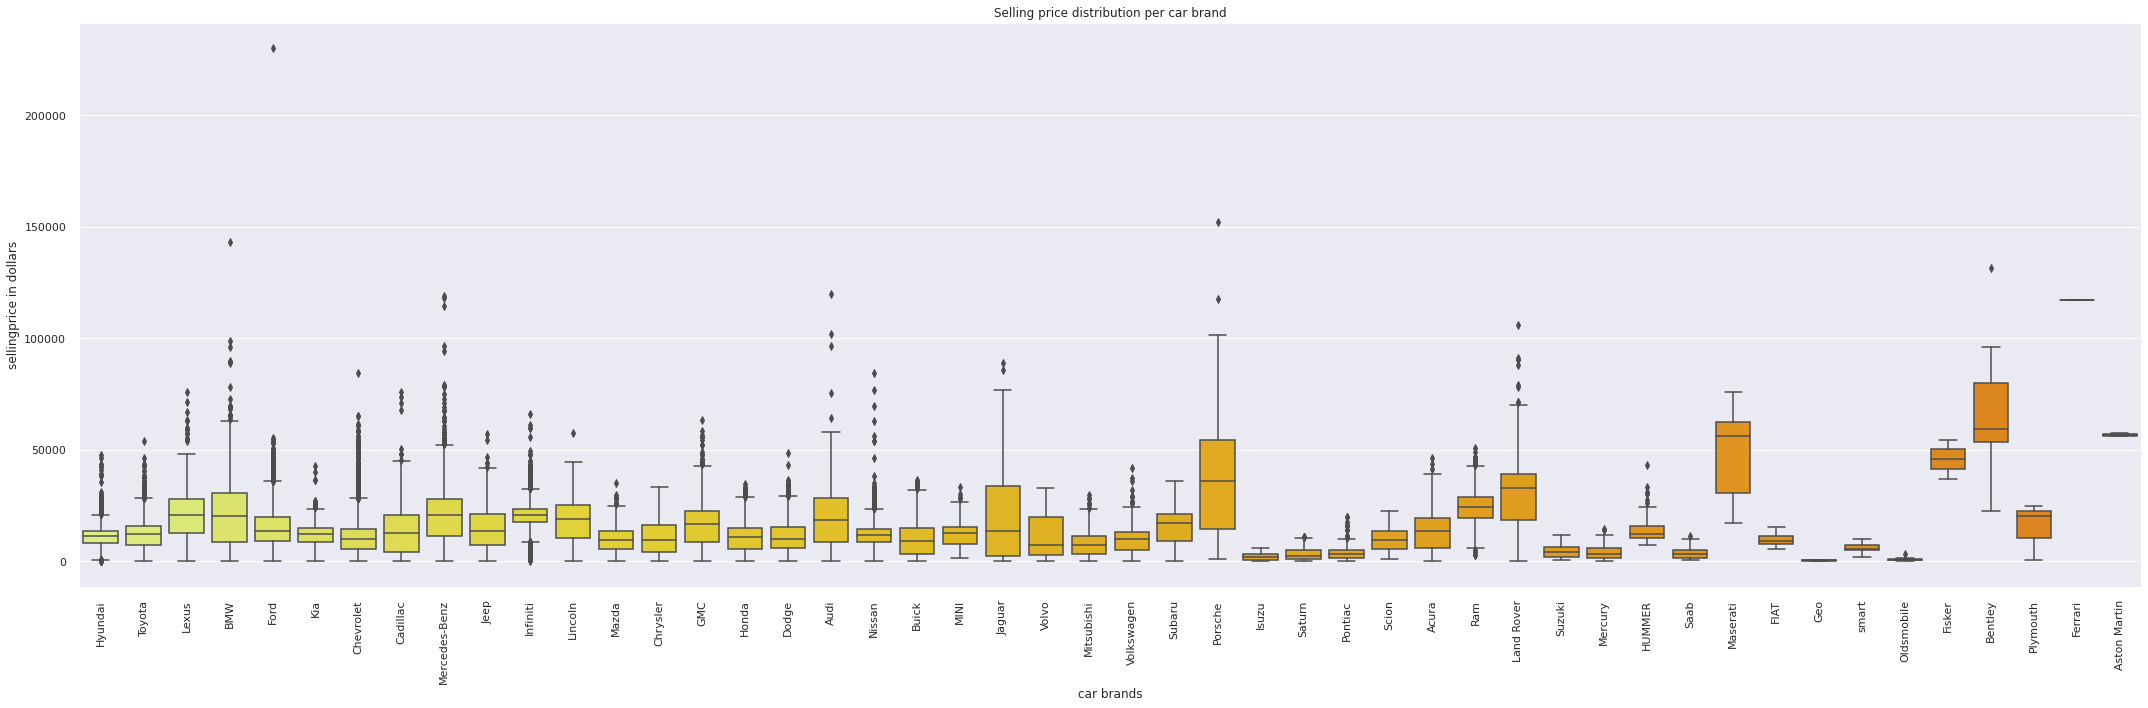

In [ ]:
#plotting car brands aganist selling price to determine distribution of sales
plt.figure(figsize = (30,10))
sns.set(font_scale=1)
sns.boxplot(x='car brands', y='sellingprice in dollars', data=df, palette='Wistia').set(title='Selling price distribution per car brand')
plt.xticks(rotation=90)
plt.tight_layout()


**Answer for Q3**: By vieweing the tallest whiskers that represents the wider distribution, Porsche and Jaguar had the widest distrubtion
As for the most expensive, we viewed the outliers. Ford and Porsche were the most expensive


**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:
corr = df.corr()
corr

,year,condition,odometer,mmr in dollars,sellingprice in dollars
year,1.000000,0.549158,-0.777219,0.592904,0.581164
condition,0.549158,1.000000,-0.540371,0.476200,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900
mmr in dollars,0.592904,0.476200,-0.587920,1.000000,0.979783
sellingprice in dollars,0.581164,0.529141,-0.580900,0.979783,1.000000


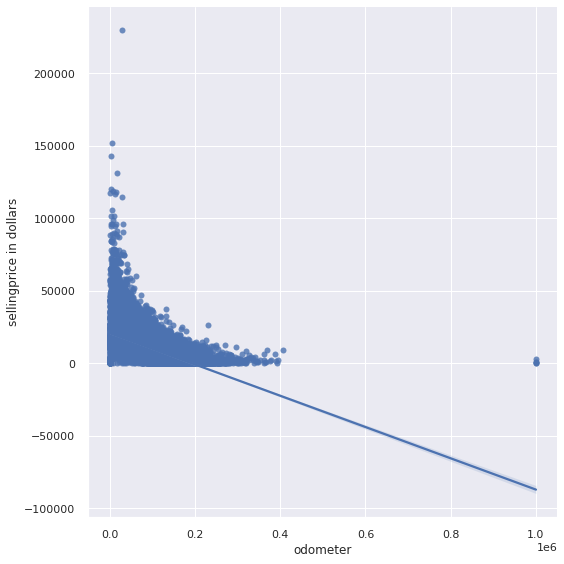

In [ ]:
#plotting odometer aganist selling price to draw line of best fit and determine the magnitude of the correlation
sns.lmplot(x='odometer', y='sellingprice in dollars', data=df, height=8);

**Answer for Q4**: Odometer is negatively correlated with the selling price. With every 1 extra mile, selling price reduces by 0.581. This correlation is considered a moderate correlation as 0.5 in magnitude is not very close to 1 

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

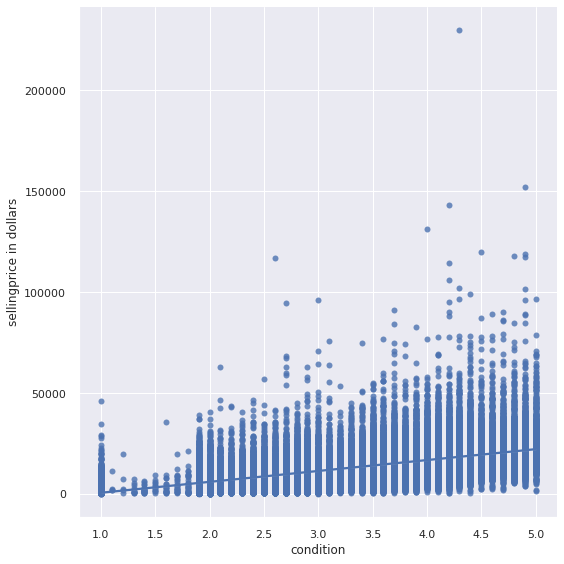

In [ ]:
#plotting condition aganist selling price to draw line of best fit and determine the magnitude of the correlation
sns.lmplot(x='condition', y='sellingprice in dollars', data=df, height=8);

In [ ]:
#to view correlation between variables
corr = df.corr()
corr

,year,condition,odometer,mmr in dollars,sellingprice in dollars
year,1.000000,0.549158,-0.777219,0.592904,0.581164
condition,0.549158,1.000000,-0.540371,0.476200,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900
mmr in dollars,0.592904,0.476200,-0.587920,1.000000,0.979783
sellingprice in dollars,0.581164,0.529141,-0.580900,0.979783,1.000000


**Answer for Q5**:Condition is postively correlated with the selling price. With every 1 condition increase, selling price increases by 0.529. This correlation is considered a moderate correlation as 0.5 as magnitude is not very close to 1 

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

In [ ]:
#sort the values descendingly
sorted_df =df.groupby('body')['sellingprice in dollars'].mean().sort_values(ascending=False)
sorted_df

body
Pickup Truck    17981.766407
Convertible     17581.563278
Coupe           16538.921097
SUV             16221.941270
Minivan         11981.053571
Sedan           11861.795912
Hatchback       10320.636123
Wagon            9872.678720
Name: sellingprice in dollars, dtype: float64

In [ ]:
#Converting series to dataframe to be used in plot
new_df= sorted_df.to_frame()
new_df.reset_index(inplace=True)
new_df = new_df.rename(columns = {'index':'body'})
new_df

,body,sellingprice in dollars
0,Pickup Truck,17981.766407
1,Convertible,17581.563278
2,Coupe,16538.921097
3,SUV,16221.941270
4,Minivan,11981.053571
5,Sedan,11861.795912
6,Hatchback,10320.636123
7,Wagon,9872.678720


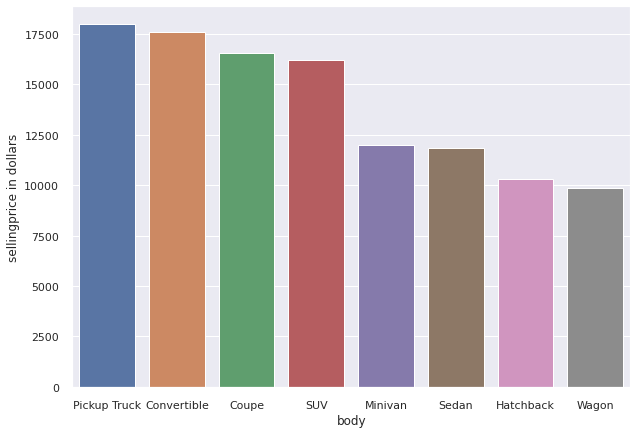

In [ ]:
plt.figure(figsize = (10,7))
sns.set(font_scale=1)
sns.barplot(data=new_df, x="body", y="sellingprice in dollars")

**Answer for Q6**: By viewing the mean of body based on the selling price and the barplot, Pickup Truck is the most expensive and Wagon is the least expensive 


## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

**1) Encode data:** We used one hot encoding because the chosen categorical variables were nominal in nature and didn't have lots of options that would be encoded

In [ ]:
df['car brands'].unique()

array(['Hyundai', 'Toyota', 'Lexus', 'BMW', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-Benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'GMC', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'MINI', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land Rover', 'Suzuki', 'Mercury', 'HUMMER',
       'Saab', 'Maserati', 'FIAT', 'Geo', 'smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston Martin'], dtype=object)

In [ ]:
#find correlation between numerical independent and dependant variable
corr =df.corr()
corr

,year,condition,odometer,mmr in dollars,sellingprice in dollars
year,1.000000,0.549158,-0.777219,0.592904,0.581164
condition,0.549158,1.000000,-0.540371,0.476200,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900
mmr in dollars,0.592904,0.476200,-0.587920,1.000000,0.979783
sellingprice in dollars,0.581164,0.529141,-0.580900,0.979783,1.000000


**As for the categorical variables, we have chosen to encode car brands,body,transmission as they are logically the most affecting attributes on selling price and we expect them to have notable correlation the selling price**

We expect that with specifc car brands the selling price will be relatively high. Also we deduced, from data visualization above, that the transmission type affects the selling price. The body can also be an important factor in determining selling price


In [ ]:
#encode the data using one hot

encoded_df=df
categorical_columns = ['car brands', 'body', 'transmission']
encoded_df = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')
encoded_df.head(10)

,year,model,trim,vin,state,condition,odometer,exterior color,interior,seller,...,car brands_Volvo,car brands_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
0,2013,Sonata,GLS,5npeb4acxdh702805,MA,3.9,50404.0,black,gray,The hertz corporation,...,0,0,0,0,0,0,0,1,0,0
1,2014,4Runner,SR5,jtezu5jr2e5064567,FL,4.9,17846.0,gray,black,Award auto sales and leasing inc,...,0,0,0,0,0,0,1,0,0,0
2,2012,IS 250,Base,jthbf5c24c5168599,FL,4.1,21122.0,silver,black,Lexus financial services,...,0,0,0,0,0,0,0,1,0,0
3,2002,X5,4.4i,5uxfb33562lh33864,FL,1.9,145303.0,black,black,Peddle llc,...,0,0,0,0,0,0,1,0,0,0
4,2014,E-Series Van,E-250,1ftne2ew0eda31832,WA,4.9,6714.0,white,gray,U-haul,...,0,0,0,0,1,0,0,0,0,0
5,2014,Optima,LX,5xxgm4a70eg329048,CO,4.6,8386.0,black,gray,"Kia motors america, inc",...,0,0,0,0,0,0,0,1,0,0
6,2007,Avalanche,LS,3gnfk12387g117727,WA,3.6,100676.0,gray,black,Lexus of tacoma at fife,...,0,0,0,0,0,1,0,0,0,0
7,2008,CTS,Base,1g6dv57v180180380,CA,4.6,87860.0,white,beige,Aaero sweet company,...,0,0,0,0,0,0,0,1,0,0
8,2011,E-Class,E350,wddhf5gb6ba419589,IL,1.7,27819.0,gray,black,Wells fargo dealer services,...,0,0,0,0,0,0,0,1,0,0
9,2014,Forte,LX,knafx4a60e5219872,NV,4.9,4046.0,blue,gray,"Kia motors america, inc",...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#find correlation between independent and depended variable after encoding
corr = encoded_df.corr()
corr

,year,condition,odometer,mmr in dollars,sellingprice in dollars,car brands_Aston Martin,car brands_Audi,car brands_BMW,car brands_Bentley,car brands_Buick,...,car brands_Volvo,car brands_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
year,1.000000,0.549158,-0.777219,0.592904,0.581164,-0.005479,-0.018805,-0.041495,-0.010103,-0.049946,...,-0.041187,0.009009,-0.047189,0.058669,0.014068,-0.053960,-0.026285,0.062504,-0.026581,-0.089053
condition,0.549158,1.000000,-0.540371,0.476200,0.529141,0.001567,0.003547,0.031729,0.001399,-0.017882,...,-0.005351,0.013689,-0.015483,0.037711,-0.039218,-0.012558,0.091832,-0.061044,-0.019195,-0.032498
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900,-0.007428,-0.005750,-0.009054,-0.006542,0.028816,...,0.025496,-0.018664,-0.009061,-0.074215,0.040233,0.084742,0.054586,-0.082428,0.029554,0.033408
mmr in dollars,0.592904,0.476200,-0.587920,1.000000,0.979783,0.025969,0.072904,0.159136,0.072908,-0.036304,...,-0.018568,-0.022098,0.059114,-0.080639,-0.045432,0.141116,0.156279,-0.175161,-0.071510,-0.045022
sellingprice in dollars,0.581164,0.529141,-0.580900,0.979783,1.000000,0.029308,0.069786,0.157110,0.073631,-0.036035,...,-0.017794,-0.021359,0.059499,-0.078700,-0.042904,0.136782,0.155534,-0.174347,-0.070359,-0.049499
car brands_Aston Martin,-0.005479,0.001567,-0.007428,0.025969,0.029308,1.000000,-0.000672,-0.001268,-0.000086,-0.000659,...,-0.000511,-0.000182,0.032807,-0.001483,-0.001604,-0.002002,-0.003846,-0.006087,-0.001170,-0.001256
car brands_Audi,-0.018805,0.003547,-0.005750,0.072904,0.069786,-0.000672,1.000000,-0.019842,-0.001344,-0.010323,...,-0.007992,-0.002853,0.018050,-0.021253,-0.025104,-0.031342,-0.014188,0.023480,0.026933,0.011235
car brands_BMW,-0.041495,0.031729,-0.009054,0.159136,0.157110,-0.001268,-0.019842,1.000000,-0.002535,-0.019467,...,-0.015070,-0.005380,0.066267,-0.028810,-0.047340,-0.059103,-0.026246,0.037836,-0.024541,0.010892
car brands_Bentley,-0.010103,0.001399,-0.006542,0.072908,0.073631,-0.000086,-0.001344,-0.002535,1.000000,-0.001319,...,-0.001021,-0.000365,0.040030,-0.002967,-0.003208,-0.004005,-0.007693,-0.005603,-0.002339,-0.002512
car brands_Buick,-0.049946,-0.017882,0.028816,-0.036304,-0.036035,-0.000659,-0.010323,-0.019467,-0.001319,1.000000,...,-0.007840,-0.002799,-0.020101,-0.022779,-0.016229,-0.030749,-0.000332,0.053025,-0.017962,-0.018120


In [ ]:
#get the most correlated variables with the selling price
corr['sellingprice in dollars'].sort_values(ascending=False, key=lambda x: x.abs()).head(15)

sellingprice in dollars     1.000000
mmr in dollars              0.979783
year                        0.581164
odometer                   -0.580900
condition                   0.529141
body_Sedan                 -0.174347
car brands_BMW              0.157110
body_SUV                    0.155534
car brands_Mercedes-Benz    0.136889
body_Pickup Truck           0.136782
car brands_Porsche          0.129055
car brands_Infiniti         0.121583
car brands_Ram              0.109106
car brands_Lexus            0.109035
car brands_Land Rover       0.105371
Name: sellingprice in dollars, dtype: float64

**2) Normalization**

In [ ]:
#normalize the numerical columns
numerical_columns = ['condition', 'odometer','year','sellingprice in dollars']


encoded_df[numerical_columns] = ( 
    
    encoded_df[numerical_columns] - encoded_df[numerical_columns].min()  
    
) /( 
    
    encoded_df[numerical_columns].max() - encoded_df[numerical_columns].min()
)
encoded_df.head(10)

,year,model,trim,vin,state,condition,odometer,exterior color,interior,seller,...,car brands_Volvo,car brands_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
0,0.92,Sonata,GLS,5npeb4acxdh702805,MA,0.725,0.050403,black,gray,The hertz corporation,...,0,0,0,0,0,0,0,1,0,0
1,0.96,4Runner,SR5,jtezu5jr2e5064567,FL,0.975,0.017845,gray,black,Award auto sales and leasing inc,...,0,0,0,0,0,0,1,0,0,0
2,0.88,IS 250,Base,jthbf5c24c5168599,FL,0.775,0.021121,silver,black,Lexus financial services,...,0,0,0,0,0,0,0,1,0,0
3,0.48,X5,4.4i,5uxfb33562lh33864,FL,0.225,0.145302,black,black,Peddle llc,...,0,0,0,0,0,0,1,0,0,0
4,0.96,E-Series Van,E-250,1ftne2ew0eda31832,WA,0.975,0.006713,white,gray,U-haul,...,0,0,0,0,1,0,0,0,0,0
5,0.96,Optima,LX,5xxgm4a70eg329048,CO,0.900,0.008385,black,gray,"Kia motors america, inc",...,0,0,0,0,0,0,0,1,0,0
6,0.68,Avalanche,LS,3gnfk12387g117727,WA,0.650,0.100675,gray,black,Lexus of tacoma at fife,...,0,0,0,0,0,1,0,0,0,0
7,0.72,CTS,Base,1g6dv57v180180380,CA,0.900,0.087859,white,beige,Aaero sweet company,...,0,0,0,0,0,0,0,1,0,0
8,0.84,E-Class,E350,wddhf5gb6ba419589,IL,0.175,0.027818,gray,black,Wells fargo dealer services,...,0,0,0,0,0,0,0,1,0,0
9,0.96,Forte,LX,knafx4a60e5219872,NV,0.975,0.004045,blue,gray,"Kia motors america, inc",...,0,0,0,0,0,0,0,1,0,0


**3) Training-Test Split**


In [ ]:
#first we drop the un-needed indenpendent variables based on the correlation deduced above. Also, the saledate is constant so it will also be dropped
x=encoded_df
x= x.drop('vin',axis=1) # Independent variable
x= x.drop('seller',axis=1) # Independent variable
x= x.drop('trim',axis=1) # Independent variable
x= x.drop('interior',axis=1) # Independent variable
x= x.drop('exterior color',axis=1) # Independent variable
x= x.drop('mmr in dollars',axis=1) # Independent variable
x= x.drop('saledate',axis=1) # Independent variable
x= x.drop('state',axis=1) # Independent variable
x= x.drop('model',axis=1) # Independent variable

x.head()


,year,condition,odometer,sellingprice in dollars,car brands_Aston Martin,car brands_Audi,car brands_BMW,car brands_Bentley,car brands_Buick,car brands_Cadillac,...,car brands_Volvo,car brands_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
0,0.92,0.725,0.050403,0.046770,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.96,0.975,0.017845,0.129432,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.88,0.775,0.021121,0.104633,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.48,0.225,0.145302,0.013270,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.96,0.975,0.006713,0.095497,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# split the data into train and test data and define the dependent variable
from sklearn.model_selection import train_test_split
x= x.drop('sellingprice in dollars',axis=1) # Independent variable
y = encoded_df['sellingprice in dollars'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])



Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
x.head(10)

,year,condition,odometer,car brands_Aston Martin,car brands_Audi,car brands_BMW,car brands_Bentley,car brands_Buick,car brands_Cadillac,car brands_Chevrolet,...,car brands_Volvo,car brands_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
0,0.92,0.725,0.050403,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.96,0.975,0.017845,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.88,0.775,0.021121,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.48,0.225,0.145302,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.96,0.975,0.006713,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0.96,0.900,0.008385,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.68,0.650,0.100675,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,0.72,0.900,0.087859,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,0.84,0.175,0.027818,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0.96,0.975,0.004045,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Modelling

_Apply the linear regression model below._

In [ ]:
#create the regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

## Model Evaluation

_Evaluate the model you applied._

**Evaluate Using RMSE**

In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(x_test)
rmse = mean_squared_error(y_pred, y_test, squared=False)
print('The root mean square error (RMSE) is: ', rmse)

The root mean square error (RMSE) is:  0.02370028198689985


**Evaluate Using R-Squared**

In [ ]:
R_square = lin_reg.score(x_test,y_test)
print('R^2 obtained is:', R_square)

R^2 obtained is: 0.6788013037728275


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The model accuracy is relatively good as the r squared value is higher than 0.5 which indicated that the independent variables chosen does cause the variation in the selling price. However, this isn't the most accurate model as other variables than those in the dataset may affect the buying decision and produce a much higher r-squared value.